# RMSX Demonstration

This notebook provides an end-to-end example of how to use **RMSX** for analyzing
molecular dynamics (MD) simulations. We'll show how to:

1. Set up the environment and install dependencies
2. Prepare input files (structure and trajectory)
3. Run RMSX on a single chain
4. Run RMSX on multiple chains simultaneously
5. Generate FlipBook snapshots to visualize your protein movements
6. Display and interpret the results

> **Note:** Adjust file paths to match your local environment.

## 1. Environment Setup

**Please ensure you have downloaded R and ChimeraX before proceeding**

M1 macs can run intel versions of R but that won't suffice here. If the following does not compile make sure you are using the correct version of R for your machine. We'll use it for plotting the heatmaps and flanking RMSD and RMSF plots

Once you have those installed you can just run each of the following cells in order to generate RMSX and the associated plots.


Qwick Start:

In [1]:
# One-click setup
import sys, subprocess, pathlib, os

REPO_URL = "https://github.com/AntunesLab/rmsx.git"
REPO_DIR = pathlib.Path.cwd() / "rmsx"       # clone next to the notebook
PKG_DIR  = REPO_DIR / "rmsx"                 # the Python package folder (has __init__.py)

# 1) Clone if missing
if not REPO_DIR.exists():
    print("Cloning RMSX…")
    subprocess.check_call(["git", "clone", REPO_URL, str(REPO_DIR)])

# 2) Install into this notebook’s environment (editable so changes show up)
subprocess.check_call([sys.executable, "-m", "pip", "install", "-e", str(REPO_DIR)])

# 3) Optional: check Rscript (Windows users: set the full path below if needed)
RSCRIPT = os.environ.get("RSCRIPT", "Rscript")
try:
    out = subprocess.run([RSCRIPT, "-e", "cat(R.version.string)"], capture_output=True, text=True, check=False)
    print(out.stdout or out.stderr or "Rscript OK")
except FileNotFoundError:
    print("⚠️ Rscript not found. Plots will be skipped until R is installed or RSCRIPT is set.")


Obtaining file:///Users/finn/Documents/GitHub/rmsx_paper_files/rmsx/rmsx
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Checking if build backend supports build_editable: started
  Checking if build backend supports build_editable: finished with status 'done'
  Getting requirements to build editable: started
  Getting requirements to build editable: finished with status 'done'
  Preparing editable metadata (pyproject.toml): started
  Preparing editable metadata (pyproject.toml): finished with status 'done'
  Building editable for rmsx-timeseries-rmsf (pyproject.toml): started
  Building editable for rmsx-timeseries-rmsf (pyproject.toml): finished with status 'done'
  Created wheel for rmsx-timeseries-rmsf: filename=rmsx_timeseries_rmsf-0.1.0-0.editable-py3-none-any.whl size=7244 sha256=899f389d3a964a090382444a2662bd6e4f14d6b732e0b4ef228226d6a0946a70
  Stored in directory: /private/var/folders/y6/30y4_6m171g7b2mczs5c9h140000gn/T/p

*Windows users: if R isn’t on PATH, set RSCRIPT before running:*

In [2]:
import os
#os.environ["RSCRIPT"] = r"C:\Program Files\R\R-4.4.1\bin\Rscript.exe"

Load Test case (if you'd like to try your own files, please see the next section):

In [4]:
from pathlib import Path
import os
import rmsx.rmsx as core
from rmsx.rmsx import run_rmsx, run_rmsx_flipbook, all_chain_rmsx, run_shift_flipbook

pkg_dir = Path(core.__file__).resolve().parent
# Look for test_files in common spots
candidates = [
    pkg_dir.parent / "test_files",
    pkg_dir.parent.parent / "test_files",
    Path.cwd() / "test_files",
    Path.cwd() / "rmsx" / "test_files",
]
test_dir = next((p for p in candidates if p.exists()), None)
if not test_dir:
    raise FileNotFoundError("Couldn't find test_files. Make sure you cloned the repo.")

pdb_file   = (test_dir / "1UBQ.pdb").as_posix()
dcd_file   = (test_dir / "mon_sys.dcd").as_posix()
output_dir = (test_dir / "example1").as_posix()



/Users/finn/Documents/rmsx_in_md_analysis/env/lib/python3.9/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


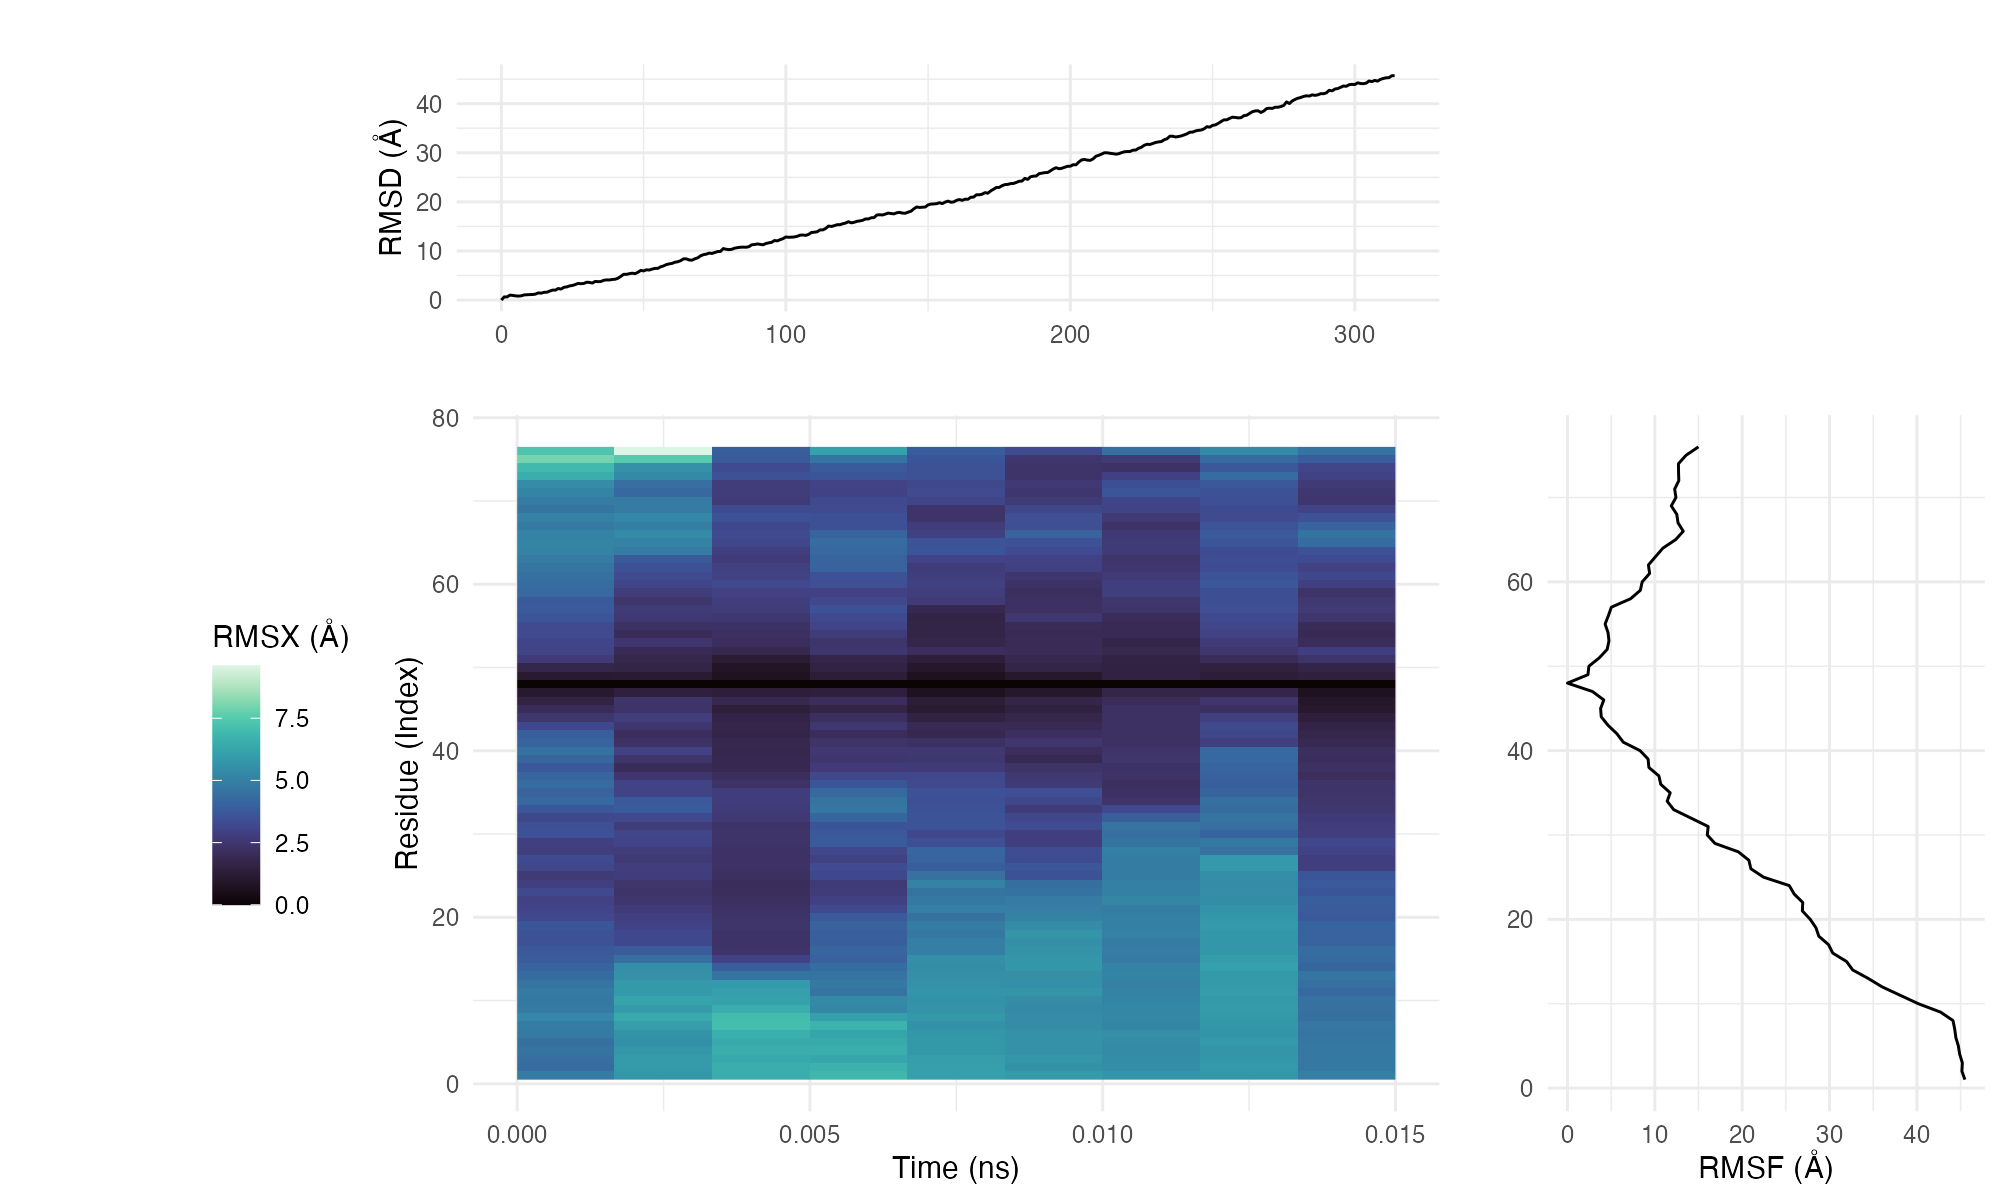

Done. Outputs in: /Users/finn/Documents/GitHub/rmsx_paper_files/rmsx/rmsx/test_files/example1


In [6]:
# Feel free to explore your own files here, or use the test files provided in the repo.

# pdb_file, = "example/path/to/your.pdb",
# dcd_file = "example/path/to/your.dcd" #or any other trajectory format
# output_dir = "example/path/to/your/output_dir"  # where to save results

# make sure you update chain_sele below as well or leave it as None to see your options"

run_rmsx(
    topology_file=pdb_file,        # PDB or topology file
    trajectory_file=dcd_file,      # Trajectory file
    output_dir=output_dir,         # Location for RMSX outputs
    num_slices=9,                  # Divide trajectory into 9 slices
    slice_size=None,               # (Alternately specify slice_size in frames)
    rscript_executable='Rscript',  # Path to Rscript
    verbose=False,                  # Print detailed logs
    interpolate=False,             # Disable heatmap interpolation
    triple=True,                   # Generate RMSX, RMSD, and RMSF plots
    overwrite=True,                # Overwrite existing folder
    palette="mako",                # Color palette
    chain_sele="7",                # Target chain ID
    start_frame=0,                 # First frame to analyze
    end_frame=None                 # Last frame (None = all frames)
)
print("Done. Outputs in:", output_dir)


### 1.1 Install R Libraries

We use ggplot2 for heatmaps, viridis for color palettes, and a few other libraries
for data manipulation and plotting. You can tweak or remove any packages you don't need.

In [ ]:
# import sys, pathlib, importlib
#
# # Point to the repo you cloned in the notebook folder
# repo_dir = pathlib.Path.cwd() / "rmsx"        # this is the folder that contains setup.cfg/pyproject and the 'rmsx' package dir
# assert repo_dir.exists(), "Expected ./rmsx to exist. Did you clone the repo here?"
#
# # Put the repo *parent* at the front of sys.path so 'import rmsx' resolves to the local repo
# sys.path.insert(0, str(repo_dir.parent.resolve()))
#
# # Purge any cached/installed rmsx modules from this kernel
# for modname in ("rmsx", "rmsx.rmsx"):
#     if modname in sys.modules:
#         del sys.modules[modname]


In [ ]:
from rmsx.rmsx import run_rmsx, run_rmsx_flipbook, all_chain_rmsx


### 1.2 Clone RMSX Repository and Install Locally

Clone the RMSX GitHub repo and install it in editable mode:

## 2. Data Preparation

In this section, we'll define paths to our structure (`.pdb`) and trajectory
(`.xtc` or `.dcd`) files. Make sure to update these paths with your own data.

## 3. Single-Chain RMSX Analysis

The `run_rmsx` function computes RMSX for a specified chain (e.g., chain A or a single-chain
protein) and automatically generates:

* A **heatmap** of RMSX values vs. residue and time slice  
* An **RMSD** plot for overall structural changes  
* An **RMSF** plot over the entire simulation  

We'll also set `palette="mako"` or any color scheme supported by R's `viridis` package.

If the analysis ran successfully, RMSX will produce plots in the specified output directory.
Typically, you'll see a **CSV** with the RMSX values per residue/time-slice, plus **PNG** plots of:

1. RMSX heatmap  
2. RMSD time series  
3. RMSF bar chart

In [ ]:
# Ready to to try with your files? try it out here:

# pdb_file    = "/path/to/your/pdb"
# dcd_file    = "/path/to/your/trajectory"
# output_dir  = "/path/to/your/outputfile"  



# run_rmsx(
#     topology_file=pdb_file,
#     trajectory_file=dcd_file,
#     output_dir=output_dir,
#     num_slices=9,                   # Option 1: specify number of slices
#     slice_size=None,                # Option 2: specify slice size in frames instead
#     rscript_executable='Rscript',   # Path to Rscript (if not in PATH)
#     verbose=False,
#     interpolate=False,              # Whether to interpolate between slices
#     triple=True,                    # Generate RMSX, RMSD, RMSF together
#     overwrite=True,
#     palette="mako",
#     chain_sele=None,                # e.g., "A" for chain A. If None, single-chain is assumed
#     start_frame=0,
#     end_frame=None
# )

## 4. Multi-Chain RMSX Analysis

For a protein with multiple chains (e.g., an HIV protease dimer), you can use
`all_chain_rmsx` or `run_rmsx_flipbook` to compute RMSX for each chain separately.
The function can also map the RMSX values back onto a *combined* PDB file for a
multi-chain FlipBook.

If you only want an RMSX plot for one of your chains use `run_rmsx()`

`all_chain_rmsx()` will work regardless of the number of chains



In [ ]:
from rmsx import all_chain_rmsx

all_chain_rmsx(
    topology_file=pdb_file,
    trajectory_file=dcd_file,
    output_dir=output_dir,
    num_slices=12,
    slice_size=None,
    rscript_executable='Rscript',
    verbose=False,
    interpolate=False,
    triple=True,
    overwrite=True,
    palette="turbo",
    start_frame=0,
    end_frame=None,
    sync_color_scale=True   # Synchronize color bar across chains
)

After completion, each chain will have its own RMSX CSV and plots in subfolders of
`output_dir_multi_chain`. An additional “combined” folder usually appears, containing
snapshots that unify all chains into a single PDB per time slice.

## 5. Generating a FlipBook

**FlipBook** maps the RMSX values (stored in the B-factor column) back onto 3D structures and
arranges snapshots side-by-side. This lets you visually inspect how each region expands,
contracts, or shifts over time—much like flipping through an animation.

You can generate a FlipBook either by:

* Directly calling `run_rmsx_flipbook` (which performs RMSX **and** flipbook generation in one step), or
* Running `run_rmsx` first, then using `run_flipbook` to create the images from existing RMSX data.

In [ ]:
%load_ext autoreload
%autoreload 2

import importlib, rmsx  # your module name
importlib.reload(rmsx)


In [ ]:

run_rmsx_flipbook(
    topology_file=pdb_file,
    trajectory_file=dcd_file,
    output_dir=output_dir,
    num_slices=9,
    slice_size=None,
    rscript_executable='Rscript',
    verbose=False,
    interpolate=False,
    triple=True,
    overwrite=True,
    palette="mako",
    spacingFactor="0.8",   # Adjust space between models in the flipbook
    start_frame=0,
    end_frame=None
)

When the command completes, the script automatically launches ChimeraX in the background (if
installed) to generate high-resolution PNG snapshots. You can in ChimeraX you can reposition the structure or adjust rendering and rerun using the save png command (check the log in ChimerX).

### 5.1 Displaying the FlipBook Image

Below is an example of how to display the resulting PNG in this notebook, though the exact
file path depends on your setup.

In [ ]:
from ipywidgets import Image

flipbook_image = os.path.join(out, "chain_P1_rmsx", "rmsx_*.png")
if os.path.isfile(flipbook_image):
    display(Image(flipbook_image))
else:
    print(f"No flipbook image found at {flipbook_image}")

## 6. Visualizing Results and Interpretation

RMSX outputs three main plots by default (if `triple=True`):

- **RMSX Heatmap**: Residue index vs. time slice, colored by RMSF magnitude.
- **RMSD Plot**: Overall deviation over time.
- **RMSF Plot**: Average fluctuations per residue over the entire trajectory.

Additionally, FlipBook produces side-by-side snapshots of the protein colored by RMSX values
at each time window.

**Key questions to ask** while interpreting RMSX:
1. Which regions (residues) show the highest flexibility overall?
2. When do these flexibility spikes occur (early, mid, or late in the simulation)?
3. Does RMSX reveal multiple distinct intervals of high fluctuation?
4. How do these fluctuations align with known functional domains or events (e.g., ligand binding,
   domain motions)?

## 7. (Optional) Advanced Discussion

RMSX can be used alongside other analysis methods like:

- **Dynamic Cross-Correlation Maps (DCCM)** to see if flexible regions move in a correlated way.
- **Principal Component Analysis (PCA)** to reduce dimensionality and identify principal motions.

For scripts demonstrating DCCM or PCA, see the `dccm_example.py` or `pca_script.py` in this repository.

**Potential Future Directions** include integrating RMSX results with principal component trajectories,
or analyzing multiple replicate simulations to see if high-flexibility intervals are reproducible.

---
### **Conclusions**

In this notebook, we showed how to:
1. Install and configure **RMSX**  
2. Run RMSX on single- and multi-chain proteins  
3. Generate FlipBook snapshots to visualize fluctuations over time  
4. Interpret the RMSX plots to discover **when** and **where** the largest changes happen  

We hope this helps you get started with RMSX for your own MD simulations. For additional details,
please check out our [GitHub documentation](https://github.com/AntunesLab/rmsx) or raise an issue
if you have questions.

In [ ]:
# ptase_wt_pdb = "/Users/finn/Downloads/1OHR-apo-OK.pdb"
# ptase_wt_pdb = "/Users/finn/Downloads/1OHR-apo-OK.pdb"
# ptase_wt_pdb = "/Users/finn/Downloads/ptase-V32E.pdb"

# ptase_wt_pdb = "/Users/finn/Downloads/REFProtein_WT.gro"
#
# ptase_wt_traj = "/Users/finn/Downloads/trjCONV_ptase-wt-1_EQ1-90ns_pbc-fit-WithOUTWater.xtc"
# output_dir_ptase = "/Users/finn/Desktop/RMSX_Demo_files_mac/more_protease_examples"


pdb_file = "/Users/finn/Downloads/SdrG/nowater.pdb"
traj_file ="/Users/finn/Downloads/SdrG/trajectory.aligned.dcd"
output_dir="/Users/finn/Desktop/RMSX_Demo_files_mac/bernardi_smd_SdrG"


run_rmsx_flipbook(
    topology_file=pdb_file,
    trajectory_file=traj_file,
    output_dir=output_dir,
    num_slices=12,
    slice_size=None,
    rscript_executable='Rscript',
    verbose=True,
    interpolate=False,
    triple=True,
    overwrite=True,
    palette="turbo",
    spacingFactor="0.8",   # Adjust space between models in the flipbook
    start_frame=0,
    end_frame=None
)

In [ ]:
# ptase_wt_pdb = "/Users/finn/Downloads/1OHR-apo-OK.pdb"
# ptase_wt_pdb = "/Users/finn/Downloads/1OHR-apo-OK.pdb"
ptase_mut_pdb = "/Users/finn/Downloads/ptase-V32E.pdb"

ptase_mut_traj = "/Users/finn/Downloads/trjCONV_ptase-mt-1_EQ1-100ns_pbc-fit-WithOUTWater.xtc"
output_dir_ptase_mut = "/Users/finn/Desktop/RMSX_Demo_files_mac/more_protease_examples/mut_test"

run_rmsx_flipbook(
    topology_file=ptase_mut_pdb,
    trajectory_file=ptase_mut_traj,
    output_dir=output_dir_ptase_mut,
    num_slices=12,
    slice_size=None,
    rscript_executable='Rscript',
    verbose=True,
    interpolate=False,
    triple=True,
    overwrite=True,
    palette="turbo",
    spacingFactor="0.8",   # Adjust space between models in the flipbook
    start_frame=0,
    end_frame=None
)



In [ ]:
run_rmsx_flipbook(
    topology_file=ptase_mut_pdb,
    trajectory_file=ptase_mut_traj,
    output_dir=output_dir_ptase_mut,
    num_slices=12,
    slice_size=None,
    rscript_executable='Rscript',
    verbose=True,
    interpolate=False,
    triple=True,
    overwrite=True,
    palette="turbo",
    spacingFactor="0.8",   # Adjust space between models in the flipbook
    start_frame=50000,
    end_frame=100000
)


In [ ]:
import os, shutil, subprocess, sys, tempfile, platform
from pathlib import Path

def _which_chimerax(explicit=None):
    """
    Locate a ChimeraX executable across platforms, or raise a helpful error.
    Resolution order:
      1) explicit path argument
      2) CHIMERAX_EXECUTABLE env var
      3) PATH: 'ChimeraX' or 'chimerax'
      4) well-known install locations (macOS, Linux, Windows)
    """
    candidates = []

    if explicit:
        candidates.append(Path(explicit))

    env = os.environ.get("CHIMERAX_EXECUTABLE")
    if env:
        candidates.append(Path(env))

    # PATH hits
    for name in ("ChimeraX", "chimerax", "ChimeraX.exe"):
        p = shutil.which(name)
        if p:
            candidates.append(Path(p))

    system = platform.system()
    if system == "Darwin":
        # Standard app bundle
        candidates += [
            Path("/Applications/ChimeraX.app/Contents/MacOS/ChimeraX"),
            Path.home() / "Applications/ChimeraX.app/Contents/MacOS/ChimeraX",
        ]
    elif system == "Linux":
        candidates += [
            Path("/usr/bin/chimerax"),
            Path("/usr/local/bin/chimerax"),
            Path("/opt/ChimeraX/bin/chimerax"),
        ]
    elif system == "Windows":
        program_files = os.environ.get("ProgramFiles", r"C:\Program Files")
        program_files_x86 = os.environ.get("ProgramFiles(x86)", r"C:\Program Files (x86)")
        candidates += [
            Path(program_files) / "ChimeraX" / "bin" / "ChimeraX.exe",
            Path(program_files_x86) / "ChimeraX" / "bin" / "ChimeraX.exe",
        ]

    for c in candidates:
        if c and c.exists() and os.access(c, os.X_OK):
            return str(c)

    raise FileNotFoundError(
        "Could not find ChimeraX. Set CHIMERAX_EXECUTABLE or pass executable=... "
        "or add ChimeraX to your PATH."
    )

def open_in_chimerax(
        structure_path,
        extra_commands=None,
        gui=True,
        wait=False,
        executable=None,
        view_all=True,
):
    """
    Launch ChimeraX to open a file, using a temp .cxc script for portability.

    Parameters
    ----------
    structure_path : str | Path
        PDB/mmCIF/etc. Will be resolved to an absolute path.
    extra_commands : list[str] | None
        Extra ChimeraX commands to run after 'open'. Keep to stable commands.
        Examples: ['color byelement', 'preset apply publication']
    gui : bool
        True = normal GUI; False = --nogui (useful on headless servers).
    wait : bool
        If True, block until ChimeraX exits; else return immediately.
    executable : str | None
        Optional explicit path to ChimeraX executable.
    view_all : bool
        If True, add a 'view' after opening.

    Returns
    -------
    subprocess.Popen | int
        A Popen handle (if wait=False) or the ChimeraX return code (if wait=True).
    """
    chx = _which_chimerax(executable)
    structure_path = Path(structure_path).expanduser().resolve()
    if not structure_path.exists():
        raise FileNotFoundError(f"Input file not found: {structure_path}")

    # Construct a minimal, version-stable .cxc script
    cmds = [f'open "{structure_path.as_posix()}"']
    if view_all:
        cmds.append("view")
    if extra_commands:
        cmds.extend(extra_commands)

    # If running headless and you want ChimeraX to exit when done, add 'exit'
    # (In GUI mode we omit exit so you can interact.)
    if not gui:
        cmds.append("exit")

    # Write temp script
    tmpdir = tempfile.mkdtemp(prefix="chimerax_")
    script_path = Path(tmpdir) / "run.cxc"
    script_path.write_text("\n".join(cmds) + "\n", encoding="utf-8")

    # Build command line
    args = [chx, "--script", str(script_path)]
    if not gui:
        args.insert(1, "--nogui")

    # Spawn
    if wait:
        # Use run() to get returncode and capture stderr/stdout if needed
        completed = subprocess.run(args)
        return completed.returncode
    else:
        # Detach so the notebook cell returns immediately
        if platform.system() == "Windows":
            creationflags = subprocess.CREATE_NEW_PROCESS_GROUP | subprocess.DETACHED_PROCESS
            return subprocess.Popen(args, creationflags=creationflags)
        else:
            return subprocess.Popen(args)

# --- Example usage in a notebook cell ---
# rc = open_in_chimerax(
#     "my_structure.pdb",
#     extra_commands=["color byelement", "cartoon", "lighting soft"],
#     gui=True,       # show the UI; set False for headless servers
#     wait=False,     # return immediately so the cell doesn't block
# )
# rc


In [ ]:
from pathlib import Path

pdb_file = Path(pdb_file = "/Users/finn/Downloads/SdrG/nowater.pdb")

In [ ]:
open_in_chimerax(
    "/Users/finn/Downloads/SdrG/nowater.pdb",
    extra_commands=["color byelement", "cartoon"],
    gui=True,      # open with the GUI
    wait=False     # don't block the notebook
)

In [ ]:
import os, shutil, platform, re
from pathlib import Path

def _which_chimerax(explicit=None):
    """
    Locate a ChimeraX executable across platforms.
    On macOS, will pick the newest version from /Applications or ~/Applications.
    """
    candidates = []

    # 1) Explicit
    if explicit:
        candidates.append(Path(explicit))

    # 2) Env var
    env = os.environ.get("CHIMERAX_EXECUTABLE")
    if env:
        candidates.append(Path(env))

    # 3) PATH
    for name in ("ChimeraX", "chimerax", "ChimeraX.exe"):
        p = shutil.which(name)
        if p:
            candidates.append(Path(p))

    system = platform.system()

    if system == "Darwin":
        def find_mac_app_versions(base):
            """Return list of (version, path) tuples for ChimeraX apps in base dir."""
            results = []
            if base.exists():
                for app in base.glob("ChimeraX*.app"):
                    match = re.search(r"(\d+(?:\.\d+)*)", app.name)
                    version = tuple(int(x) for x in match.group(1).split(".")) if match else (0,)
                    exec_path = app / "Contents" / "MacOS" / "ChimeraX"
                    if exec_path.exists():
                        results.append((version, exec_path))
            return results

        # Search both /Applications and ~/Applications
        versions = []
        versions.extend(find_mac_app_versions(Path("/Applications")))
        versions.extend(find_mac_app_versions(Path.home() / "Applications"))

        if versions:
            # Pick highest version
            versions.sort(reverse=True)
            candidates.append(versions[0][1])

    elif system == "Linux":
        candidates += [
            Path("/usr/bin/chimerax"),
            Path("/usr/local/bin/chimerax"),
            Path("/opt/ChimeraX/bin/chimerax"),
        ]
    elif system == "Windows":
        program_files = os.environ.get("ProgramFiles", r"C:\Program Files")
        program_files_x86 = os.environ.get("ProgramFiles(x86)", r"C:\Program Files (x86)")
        candidates += [
            Path(program_files) / "ChimeraX" / "bin" / "ChimeraX.exe",
            Path(program_files_x86) / "ChimeraX" / "bin" / "ChimeraX.exe",
        ]

    # Return first working executable
    for c in candidates:
        if c and c.exists() and os.access(c, os.X_OK):
            return str(c)

    raise FileNotFoundError(
        "Could not find ChimeraX. Set CHIMERAX_EXECUTABLE or pass executable=... "
        "or add ChimeraX to your PATH."
    )


In [ ]:
#!/usr/bin/env python3

"""
flipbook.py  — system-agnostic ChimeraX launcher

Opens matching PDBs in numeric order, colors by B-factor with a chosen palette,
tiles views, and applies a few stable display tweaks.

Usage:
    python3 flipbook.py /path/to/dir [--palette PALETTE] [--min_bfactor MIN] [--max_bfactor MAX] [--nogui]

Example:
    python3 flipbook.py ~/RMSX_Demo/combined --palette viridis --min_bfactor 10 --max_bfactor 50
"""

import os
import sys
import argparse
import subprocess
import re
import tempfile
import platform
import shutil
from pathlib import Path

# Available palettes
COLOR_PALETTES = {
    "magma": [
        "#000004", "#120D32", "#331068", "#5A167E", "#7D2482",
        "#A3307E", "#C83E73", "#E95562", "#F97C5D", "#FEA873",
        "#FED395", "#FCFDBF"
    ],
    "inferno": [
        "#000004", "#140B35", "#3A0963", "#60136E", "#85216B",
        "#A92E5E", "#CB4149", "#E65D2F", "#F78311", "#FCAD12",
        "#F5DB4B", "#FCFFA4"
    ],
    "plasma": [
        "#0D0887", "#3E049C", "#6300A7", "#8707A6", "#A62098",
        "#C03A83", "#D5546E", "#E76F5A", "#F58C46", "#FDAD32",
        "#FCD225", "#F0F921"
    ],
    "viridis": [
        "#440154", "#482173", "#433E85", "#38598C", "#2D708E",
        "#25858E", "#1E9B8A", "#2BB07F", "#51C56A", "#85D54A",
        "#C2DF23", "#FDE725"
    ],
    "cividis": [
        "#00204D", "#00306F", "#2A406C", "#48526B", "#5E626E",
        "#727374", "#878479", "#9E9677", "#B6A971", "#D0BE67",
        "#EAD357", "#FFEA46"
    ],
    "rocket": [
        "#03051A", "#221331", "#451C47", "#6A1F56", "#921C5B",
        "#B91657", "#D92847", "#ED513E", "#F47C56", "#F6A47B",
        "#F7C9AA", "#FAEBDD"
    ],
    "mako": [
        "#0B0405", "#231526", "#35264C", "#403A75", "#3D5296",
        "#366DA0", "#3487A6", "#35A1AB", "#43BBAD", "#6CD3AD",
        "#ADE3C0", "#DEF5E5"
    ],
    "turbo": [
        "#30123B", "#4454C4", "#4490FE", "#1FC8DE", "#29EFA2",
        "#7DFF56", "#C1F334", "#F1CA3A", "#FE922A", "#EA4F0D",
        "#BE2102", "#7A0403"
    ],
}

# --------------------------- ChimeraX discovery ---------------------------

def _which_chimerax(explicit=None):
    """
    Locate a ChimeraX executable across platforms.
    Resolution order:
      1) explicit path argument
      2) CHIMERAX_EXECUTABLE env var
      3) PATH: 'ChimeraX'/'chimerax'/'ChimeraX.exe'
      4) OS-specific well-known locations
         - macOS: pick newest ChimeraX-*.app in /Applications or ~/Applications
         - Linux: /usr/local/bin/chimerax, /usr/bin/chimerax, /opt/ChimeraX/bin/chimerax
         - Windows: %ProgramFiles%/ChimeraX/bin/ChimeraX.exe (and x86)
    """
    candidates = []

    if explicit:
        candidates.append(Path(explicit))

    env = os.environ.get("CHIMERAX_EXECUTABLE")
    if env:
        candidates.append(Path(env))

    for name in ("ChimeraX", "chimerax", "ChimeraX.exe"):
        hit = shutil.which(name)
        if hit:
            candidates.append(Path(hit))

    system = platform.system()

    if system == "Darwin":
        import re as _re
        def find_mac_apps(base: Path):
            out = []
            if base.exists():
                for app in base.glob("ChimeraX*.app"):
                    m = _re.search(r"(\d+(?:\.\d+)*)", app.name)
                    version = tuple(int(x) for x in m.group(1).split(".")) if m else (0,)
                    execp = app / "Contents" / "MacOS" / "ChimeraX"
                    if execp.exists():
                        out.append((version, execp))
            return out

        versions = []
        versions += find_mac_apps(Path("/Applications"))
        versions += find_mac_apps(Path.home() / "Applications")
        # Also support the unversioned bundle name
        unversioned = Path("/Applications/ChimeraX.app/Contents/MacOS/ChimeraX")
        if unversioned.exists():
            versions.append(((9999,), unversioned))  # prefer explicitly if present

        if versions:
            versions.sort(reverse=True)
            candidates.append(versions[0][1])

    elif system == "Linux":
        candidates += [
            Path("/usr/local/bin/chimerax"),
            Path("/usr/bin/chimerax"),
            Path("/opt/ChimeraX/bin/chimerax"),
        ]

    elif system == "Windows":
        pf = os.environ.get("ProgramFiles", r"C:\Program Files")
        pfx = os.environ.get("ProgramFiles(x86)", r"C:\Program Files (x86)")
        candidates += [
            Path(pf) / "ChimeraX" / "bin" / "ChimeraX.exe",
            Path(pfx) / "ChimeraX" / "bin" / "ChimeraX.exe",
        ]

    for c in candidates:
        if c and c.exists() and os.access(c, os.X_OK):
            return str(c)

    raise FileNotFoundError(
        "Could not find ChimeraX. "
        "Set CHIMERAX_EXECUTABLE, pass --chimerax /path/to/ChimeraX, or add it to PATH."
    )

# --------------------------- palette / parsing ----------------------------

def create_color_mapping(palette_name, colors, min_bfactor, max_bfactor, num_models):
    """
    Build a ChimeraX 'color byattribute' palette mapping string for B-factors.
    Uses absolute mapping (target absc) so colors aren’t re-normalized per model.
    """
    if len(colors) < 2:
        raise ValueError("At least two colors are required to create a gradient.")

    interval = (max_bfactor - min_bfactor) / (len(colors) - 1)
    stops = []
    for i, color in enumerate(colors):
        bval = round(min_bfactor + i * interval, 2)
        stops.append((bval, color))

    mapping = ":".join([f"{b},{c}" for b, c in stops])
    # Model range #1-num_models; attribute key a:bfactor; absolute scale (absc)
    return f"color byattribute a:bfactor #1-{num_models} target absc palette {mapping}"

def extract_bfactor_range(pdb_file_paths):
    """
    Scan PDBs for min/max B-factor. Falls back to 0–1 if none found.
    """
    min_b = float("inf")
    max_b = float("-inf")
    for path in pdb_file_paths:
        try:
            with open(path, "r") as fh:
                for line in fh:
                    if line.startswith(("ATOM", "HETATM")):
                        try:
                            b = float(line[60:66].strip())
                            if b < min_b: min_b = b
                            if b > max_b: max_b = b
                        except ValueError:
                            pass
        except Exception as e:
            print(f"Error reading '{path}': {e}")
    if min_b is float("inf") or max_b is float("-inf"):
        return 0.0, 1.0
    return min_b, max_b

def find_pdb_files(directory, pattern=r'^slice_(\d+)_first_frame\.pdb$'):
    """
    List PDB files in directory matching regex pattern.
    """
    try:
        entries = os.listdir(directory)
    except Exception as e:
        print(f"Error accessing directory '{directory}': {e}")
        sys.exit(1)
    rx = re.compile(pattern)
    return [f for f in entries if os.path.isfile(os.path.join(directory, f)) and rx.match(f)]

def natural_sort_key(s):
    return [int(t) if t.isdigit() else t.lower() for t in re.split(r'(\d+)', s)]

# ------------------------------- main -------------------------------------

def main():
    ap = argparse.ArgumentParser(
        description="Open PDB files in ChimeraX in numerical order and apply coloring/tiling."
    )
    ap.add_argument("directory", type=str, help="Directory containing PDB files.")
    ap.add_argument("--palette", type=str, default="viridis", choices=COLOR_PALETTES.keys(),
                    help="Color palette for B-factor coloring.")
    ap.add_argument("--min_bfactor", type=float, default=None, help="Minimum B-factor value.")
    ap.add_argument("--max_bfactor", type=float, default=None, help="Maximum B-factor value.")
    ap.add_argument("--nogui", action="store_true", help="Run ChimeraX headless and exit when done.")
    ap.add_argument("--chimerax", type=str, default=None,
                    help="Explicit path to ChimeraX executable (overrides auto-detect).")
    args = ap.parse_args()

    directory = args.directory
    if not os.path.isdir(directory):
        print(f"Error: '{directory}' is not a directory.")
        sys.exit(1)

    pdb_files = find_pdb_files(directory)
    if not pdb_files:
        print(f"No files like 'slice_<number>_first_frame.pdb' in '{directory}'.")
        sys.exit(1)

    pdb_files_sorted = sorted(pdb_files, key=natural_sort_key)
    pdb_paths = [os.path.join(directory, f) for f in pdb_files_sorted]
    num_models = len(pdb_paths)

    # B-factor range
    if args.min_bfactor is None or args.max_bfactor is None:
        min_b, max_b = extract_bfactor_range(pdb_paths)
        print(f"Detected B-factor range: {min_b:.2f} – {max_b:.2f}")
    else:
        min_b, max_b = args.min_bfactor, args.max_bfactor
        print(f"Using provided B-factor range: {min_b:.2f} – {max_b:.2f}")

    palette = COLOR_PALETTES.get(args.palette)
    if not palette:
        print(f"Error: palette '{args.palette}' is not defined.")
        sys.exit(1)

    try:
        color_cmd = create_color_mapping(args.palette, palette, min_b, max_b, num_models)
    except ValueError as e:
        print(e)
        sys.exit(1)

    # Tile columns = number of models (one long row). Adjust as desired.
    columns = num_models
    axis_id = num_models + 1  # define axis will create an extra model

    # Build the ChimeraX command list — keep to stable commands
    open_cmds = [f"open '{p}'" for p in pdb_paths]

    # NOTE: we rely on the absolute (absc) palette in color_cmd.
    # Avoid duplicate 'color byattribute' with default settings.
    extra_cmds = [
        "view",
        "define axis",                      # creates a reference axis model
        f"view #{axis_id} zalign #{axis_id}",
        f"turn x 90 center #{axis_id}",
        f"close #{axis_id}",
        # Optional stylistic choices; comment out if not desired:
        # "cartoon",                        # ensure cartoon display
        # "style cartoon worms",            # use worms style if preferred
        "light soft multishadow 128",
        "graphics silhouettes true",
        "set bgColor white",
        color_cmd,
        f"tile all columns {columns} spacingFactor 1",
    ]

    # Combine into a .cxc script (safer across shells/OS)
    cmds = open_cmds + extra_cmds
    script_text = "\n".join(cmds) + "\n"
    if args.nogui:
        script_text += "exit\n"   # only auto-exit in headless mode

    tmpdir = tempfile.mkdtemp(prefix="chimerax_")
    script_path = Path(tmpdir) / "run.cxc"
    script_path.write_text(script_text, encoding="utf-8")

    try:
        chx = _which_chimerax(args.chimerax)
    except FileNotFoundError as e:
        print(str(e))
        sys.exit(1)

    # Assemble invocation
    run_args = [chx, "--script", str(script_path)]
    if args.nogui:
        run_args.insert(1, "--nogui")

    try:
        rc = subprocess.run(run_args, check=False)
        if rc.returncode != 0:
            print(f"ChimeraX exited with non-zero status: {rc.returncode}")
            sys.exit(rc.returncode)
    except FileNotFoundError:
        print("Could not execute ChimeraX. Check your installation and permissions.")
        sys.exit(1)
    except Exception as e:
        print(f"Unexpected error launching ChimeraX: {e}")
        sys.exit(1)

if __name__ == "__main__":
    main()


In [ ]:
%xmode Plain


In [ ]:
import os, sys, platform, shutil, subprocess, re
from pathlib import Path

def debug_chimerax():
    print("=== Platform ===")
    print(platform.platform())
    print("system:", platform.system())
    print("python:", sys.executable)

    print("\n=== Env ===")
    print("CHIMERAX_EXECUTABLE:", os.environ.get("CHIMERAX_EXECUTABLE"))
    print("PATH:", os.environ.get("PATH"))

    print("\n=== which() hits ===")
    for name in ("ChimeraX", "chimerax", "ChimeraX.exe"):
        print(f"{name:12} -> {shutil.which(name)}")

    print("\n=== macOS bundle candidates ===")
    def find_mac_apps(base: Path):
        out = []
        if base.exists():
            for pat in ("ChimeraX*.app", "UCSF ChimeraX*.app"):
                for app in base.glob(pat):
                    ver = re.search(r"(\d+(?:\.\d+){0,3})", app.name)
                    vtuple = tuple(int(x) for x in ver.group(1).split(".")) if ver else (0,)
                    exe = app / "Contents" / "MacOS" / "ChimeraX"
                    out.append((vtuple, app, exe, exe.exists(), os.access(exe, os.X_OK)))
        return sorted(out, reverse=True)

    if platform.system() == "Darwin":
        hits = []
        hits += find_mac_apps(Path("/Applications"))
        hits += find_mac_apps(Path.home()/ "Applications")
        if not hits:
            print(" (none)")
        else:
            for v, app, exe, exists, xok in hits:
                print(f"- {app.name:35} ver={'.'.join(map(str,v)) or '0'}")
                print(f"    exe: {exe}")
                print(f"    exists={exists}  executable={xok}")

        # Sanity check via LaunchServices (does not launch)
        for appname in ("UCSF ChimeraX", "ChimeraX"):
            try:
                r = subprocess.run(["open","-Ra", appname], check=False)
                print(f"'open -Ra {appname}' -> returncode {r.returncode}")
            except Exception as e:
                print(f"'open -Ra {appname}' -> ERROR {e}")

    print("\n=== Linux/Windows common locations ===")
    if platform.system() == "Linux":
        for guess in ("/usr/local/bin/chimerax","/usr/bin/chimerax","/opt/ChimeraX/bin/chimerax"):
            p = Path(guess)
            print(f"{p}  exists={p.exists()}  exec={os.access(p, os.X_OK)}")
    if platform.system() == "Windows":
        pf  = os.environ.get("ProgramFiles", r"C:\Program Files")
        pfx = os.environ.get("ProgramFiles(x86)", r"C:\Program Files (x86)")
        for base in (Path(pf), Path(pfx)):
            for d in [base/"ChimeraX", *base.glob("ChimeraX*")]:
                exe = d / "bin" / "ChimeraX.exe"
                print(f"{exe}  exists={exe.exists()}  exec={os.access(exe, os.X_OK)}")

debug_chimerax()



Updated chimeraX to

In [15]:
# Minimal, community-aligned downsizing for GitHub sharing
# - Keep only protein backbone or Cα
# - Drop solvent/ions/ligands
# - Temporal downsampling via stride
# - Write compressed XTC (3, 2, 1 decimal places in nm) + DCD for comparison
# - Produce matching slim PDB topologies
#
# Edit the USER SETTINGS section only.

from pathlib import Path
import MDAnalysis as mda
from MDAnalysis.coordinates.XTC import XTCWriter
from MDAnalysis.coordinates.DCD import DCDWriter

# ========== USER SETTINGS ==========
traj_path = "/Users/finn/Downloads/updated_protease_tfA/trjCONV_ptase-tfA_EQ1-100ns_pbc-fit-WithOUTWater.xtc"
top_path  = "/Users/finn/Downloads/updated_protease_tfB/ptase-tfB.pdb"
out_dir   = "/Users/finn/Desktop/RMSX_Demo_files_mac/gromacs_case_studies/multi_chain_example_new_protease_tfA"

# frame window (0-based frame indices, inclusive)
frame_start = 75000
frame_end   = 125000

# keep every Nth frame
strides = [1, 5, 10, 20]

# XTC decimal places in nm (XTC is lossy: 3 -> 0.001 nm; 2 -> 0.01 nm; 1 -> 0.1 nm)
xtc_decimal_places = [3, 2, 1]

# selections to export (MDAnalysis syntax)
selections = [
    ("backbone",   "protein and backbone"),
    ("calpha",     "protein and name CA"),
]
# ===================================

# --- helpers ---
def human(nbytes: int) -> str:
    try:
        for unit in ["B","KB","MB","GB","TB"]:
            if nbytes < 1024:
                return f"{nbytes:.0f} {unit}"
            nbytes /= 1024
        return f"{nbytes:.1f} PB"
    except Exception:
        return "—"

def fsize(p: Path) -> int:
    try:
        return p.stat().st_size
    except Exception:
        return 0

def write_xtc(sel_atoms, out_path: Path, start: int, stop: int, stride: int, decimals: int):
    out_path = out_path.with_suffix(".xtc")
    with XTCWriter(str(out_path), n_atoms=len(sel_atoms), precision=decimals) as W:
        for ts in sel_atoms.universe.trajectory[start:stop+1:stride]:
            W.write(sel_atoms)
    return out_path

def write_dcd(sel_atoms, out_path: Path, start: int, stop: int, stride: int):
    out_path = out_path.with_suffix(".dcd")
    with DCDWriter(str(out_path), n_atoms=len(sel_atoms)) as W:
        for ts in sel_atoms.universe.trajectory[start:stop+1:stride]:
            W.write(sel_atoms)
    return out_path

# --- main ---
out_path = Path(out_dir)
out_path.mkdir(parents=True, exist_ok=True)

print("Loading trajectory (this may take a moment)...")
u = mda.Universe(top_path, traj_path)
n_frames = len(u.trajectory)

# clamp window
start = max(0, min(frame_start, n_frames - 1))
stop  = max(0, min(frame_end,   n_frames - 1))
if stop < start:
    start, stop = stop, start

print(f"Total frames: {n_frames} | exporting window: [{start} .. {stop}] (inclusive)")
print("Generating reduced trajectories...\n")

records = []  # for size table

for tag, selstr in selections:
    sel_atoms = u.select_atoms(selstr)
    # write a matching slim topology for this selection
    pdb_path = out_path / f"{tag}_topology.pdb"
    sel_atoms.write(str(pdb_path))

    for stride in strides:
        # XTC variants at different precisions (3,2,1 decimals in nm)
        for dec in xtc_decimal_places:
            base = f"{tag}_b{start}_e{stop}_s{stride}_x{dec}"
            xtc_path = out_path / base
            xtc_path = write_xtc(sel_atoms, xtc_path, start, stop, stride, dec)
            records.append({
                "variant": base + ".xtc",
                "size": fsize(xtc_path),
                "top": pdb_path.name
            })
            print(f"[XTC x{dec}] {xtc_path.name:55s} {human(fsize(xtc_path))}")

        # DCD comparison at same stride
        base = f"{tag}_b{start}_e{stop}_s{stride}"
        dcd_path = out_path / (base + "_dcd")
        dcd_path = write_dcd(sel_atoms, dcd_path, start, stop, stride)
        records.append({
            "variant": dcd_path.name,
            "size": fsize(dcd_path),
            "top": pdb_path.name
        })
        print(f"[DCD    ] {dcd_path.name:55s} {human(fsize(dcd_path))}")

# print summary
print("\n=== SIZE SUMMARY (lower is better) ===")
w = max(len(r["variant"]) for r in records) if records else 40
print(f"{'file':{w}s}  {'size':>10}  {'topology':>18}")
print("-" * (w + 33))
for r in sorted(records, key=lambda x: x["size"]):
    print(f"{r['variant']:{w}s}  {human(r['size']):>10}  {r['top']:>18}")

print(f"\nOutputs in: {out_path.resolve()}")


Loading trajectory (this may take a moment)...
Total frames: 249751 | exporting window: [75000 .. 125000] (inclusive)
Generating reduced trajectories...

[XTC x3] backbone_b75000_e125000_s1_x3.xtc                       148 MB
[XTC x2] backbone_b75000_e125000_s1_x2.xtc                       101 MB
[XTC x1] backbone_b75000_e125000_s1_x1.xtc                       83 MB
[DCD    ] backbone_b75000_e125000_s1_dcd.dcd                      456 MB
[XTC x3] backbone_b75000_e125000_s5_x3.xtc                       30 MB
[XTC x2] backbone_b75000_e125000_s5_x2.xtc                       20 MB
[XTC x1] backbone_b75000_e125000_s5_x1.xtc                       17 MB
[DCD    ] backbone_b75000_e125000_s5_dcd.dcd                      91 MB
[XTC x3] backbone_b75000_e125000_s10_x3.xtc                      15 MB
[XTC x2] backbone_b75000_e125000_s10_x2.xtc                      10 MB
[XTC x1] backbone_b75000_e125000_s10_x1.xtc                      8 MB
[DCD    ] backbone_b75000_e125000_s10_dcd.dcd                

In [20]:
pdb_file = "/Users/finn/Desktop/RMSX_Demo_files_mac/gromacs_case_studies/multi_chain_example_new_protease_tfA/backbone_topology.pdb"

dcd_file = "/Users/finn/Desktop/RMSX_Demo_files_mac/gromacs_case_studies/multi_chain_example_new_protease_tfA/backbone_b75000_e125000_s10_dcd.dcd"

output_dir= "/Users/finn/Desktop/RMSX_Demo_files_mac/gromacs_case_studies/multi_chain_example_new_protease_tfA/calpha_flipbook"

In [ ]:
!

Clearing main output directory: /Users/finn/Desktop/RMSX_Demo_files_mac/gromacs_case_studies/multi_chain_example_new_protease_tfA/calpha_flipbook

Analyzing Chain A...
Python Executable: /Users/finn/Documents/rmsx_in_md_analysis/env/bin/python
Current Working Directory: /Users/finn/Documents/GitHub/rmsx_paper_files/rmsx
The directory '/Users/finn/Desktop/RMSX_Demo_files_mac/gromacs_case_studies/multi_chain_example_new_protease_tfA/calpha_flipbook/chain_A_rmsx' is ready for use.
Starting analysis...
Using the slicing method with num_slices=12
Truncating 9 excess frame(s). Original size: 5001, Updated: 4992
Processing frames 0 to 4991 of the trajectory.
Number of slices: 12
First frame of slice 1 written to /Users/finn/Desktop/RMSX_Demo_files_mac/gromacs_case_studies/multi_chain_example_new_protease_tfA/calpha_flipbook/chain_A_rmsx/slice_1_first_frame.pdb
Slice 1: RMSF computed for frames 0 to 415 (416 frames)
First frame of slice 2 written to /Users/finn/Desktop/RMSX_Demo_files_mac/grom

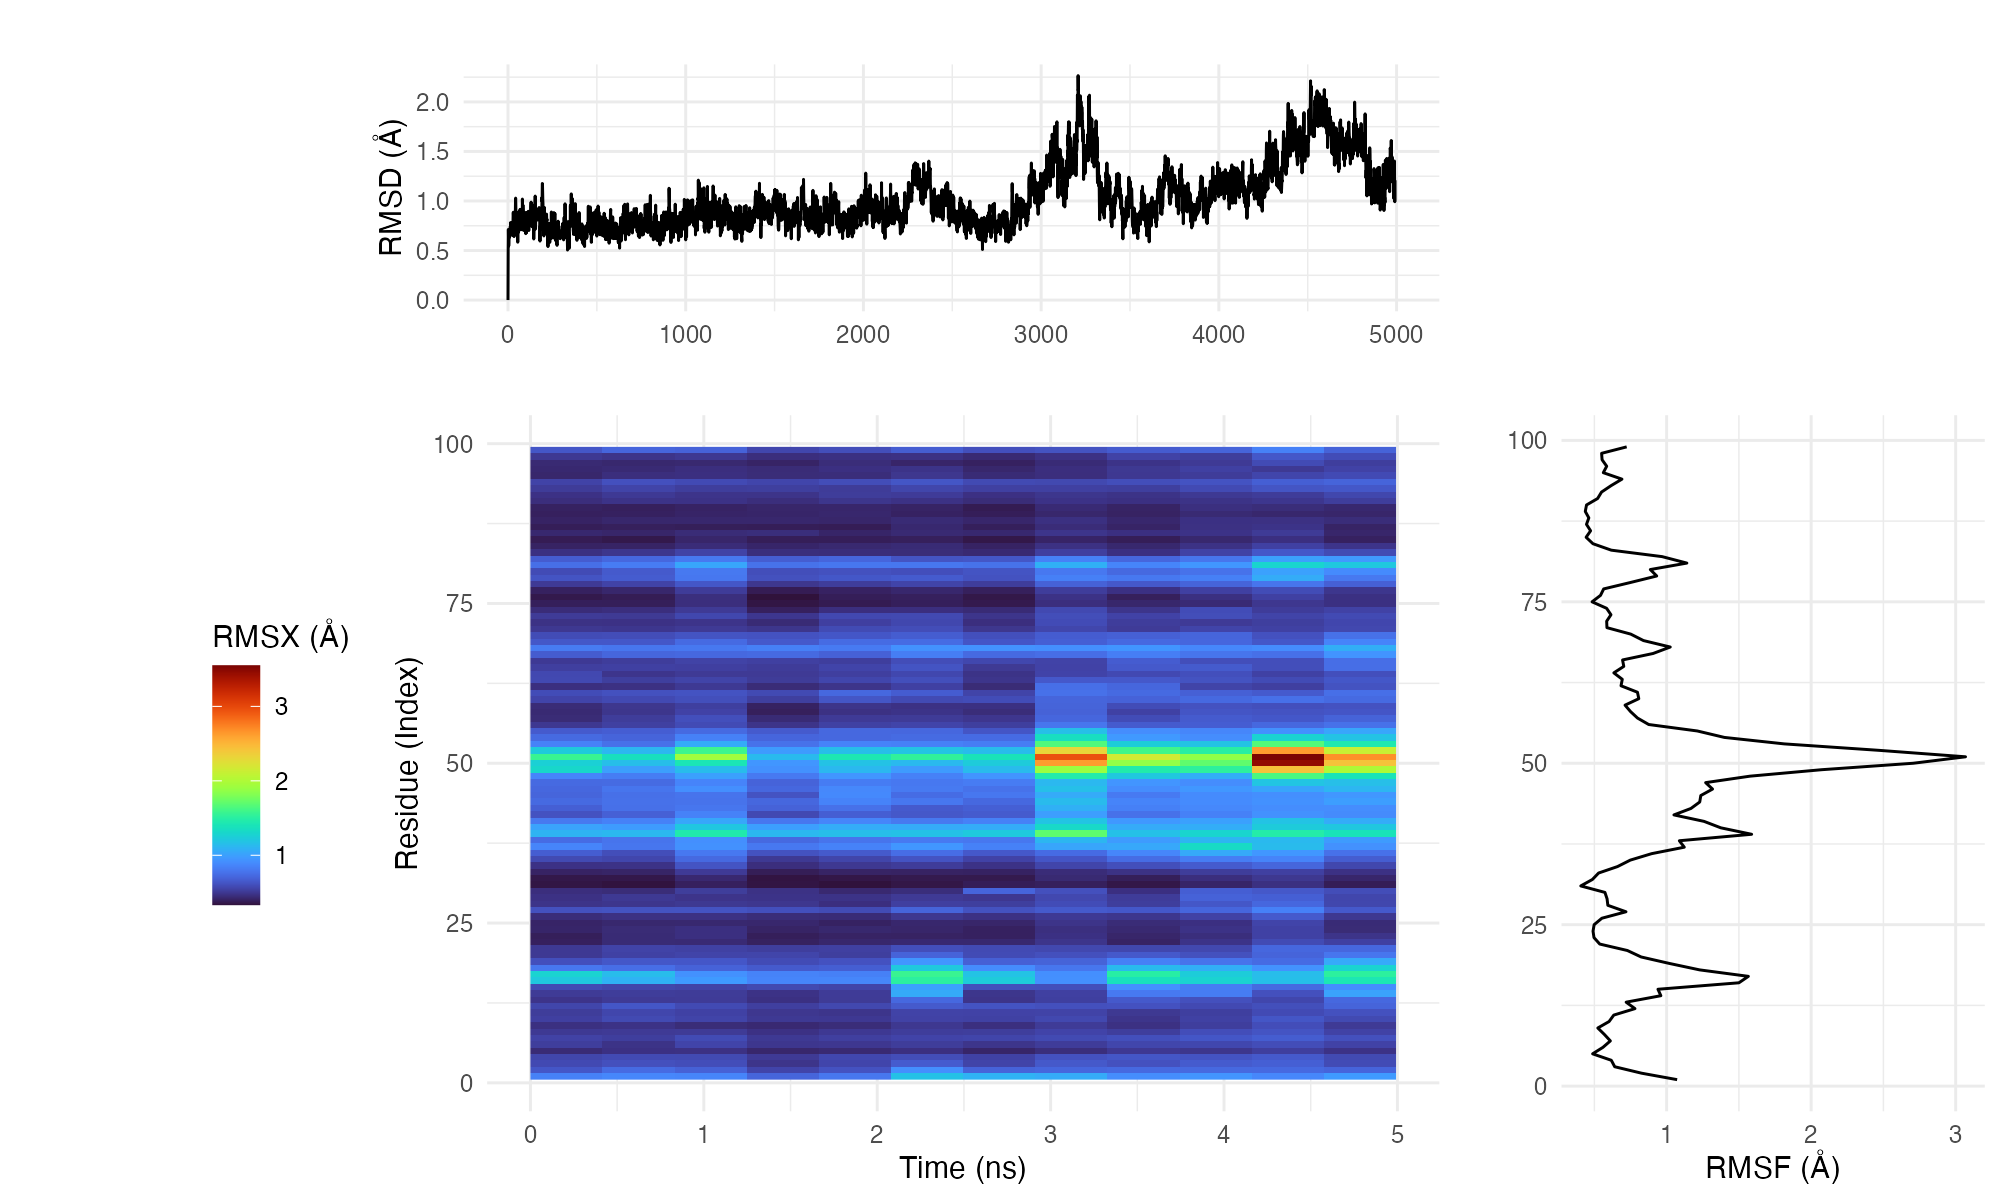

Found R script at /Users/finn/Documents/GitHub/rmsx_paper_files/rmsx/rmsx/rmsx/r_scripts/plot_rmsx.R.
Running R script command:
Rscript /Users/finn/Documents/GitHub/rmsx_paper_files/rmsx/rmsx/rmsx/r_scripts/plot_rmsx.R /Users/finn/Desktop/RMSX_Demo_files_mac/gromacs_case_studies/multi_chain_example_new_protease_tfA/calpha_flipbook/chain_B_rmsx/rmsx_backbone_b75000_e125000_s10_dcd_4.992_ns.csv /Users/finn/Desktop/RMSX_Demo_files_mac/gromacs_case_studies/multi_chain_example_new_protease_tfA/calpha_flipbook/chain_B_rmsx/rmsd.csv /Users/finn/Desktop/RMSX_Demo_files_mac/gromacs_case_studies/multi_chain_example_new_protease_tfA/calpha_flipbook/chain_B_rmsx/rmsf.csv FALSE TRUE turbo 0.3348211858633211 3.5480949405722257 FALSE 
R script executed successfully.
R STDOUT:
 $viridis
NULL

$tidyverse
NULL

$ggplot2
NULL

$viridis
NULL

$dplyr
NULL

$tidyr
NULL

$stringr
NULL

$readr
NULL

$gridExtra
NULL

$grid
NULL

[1] "arg 1"
[1] "/Users/finn/Desktop/RMSX_Demo_files_mac/gromacs_case_studies/mult

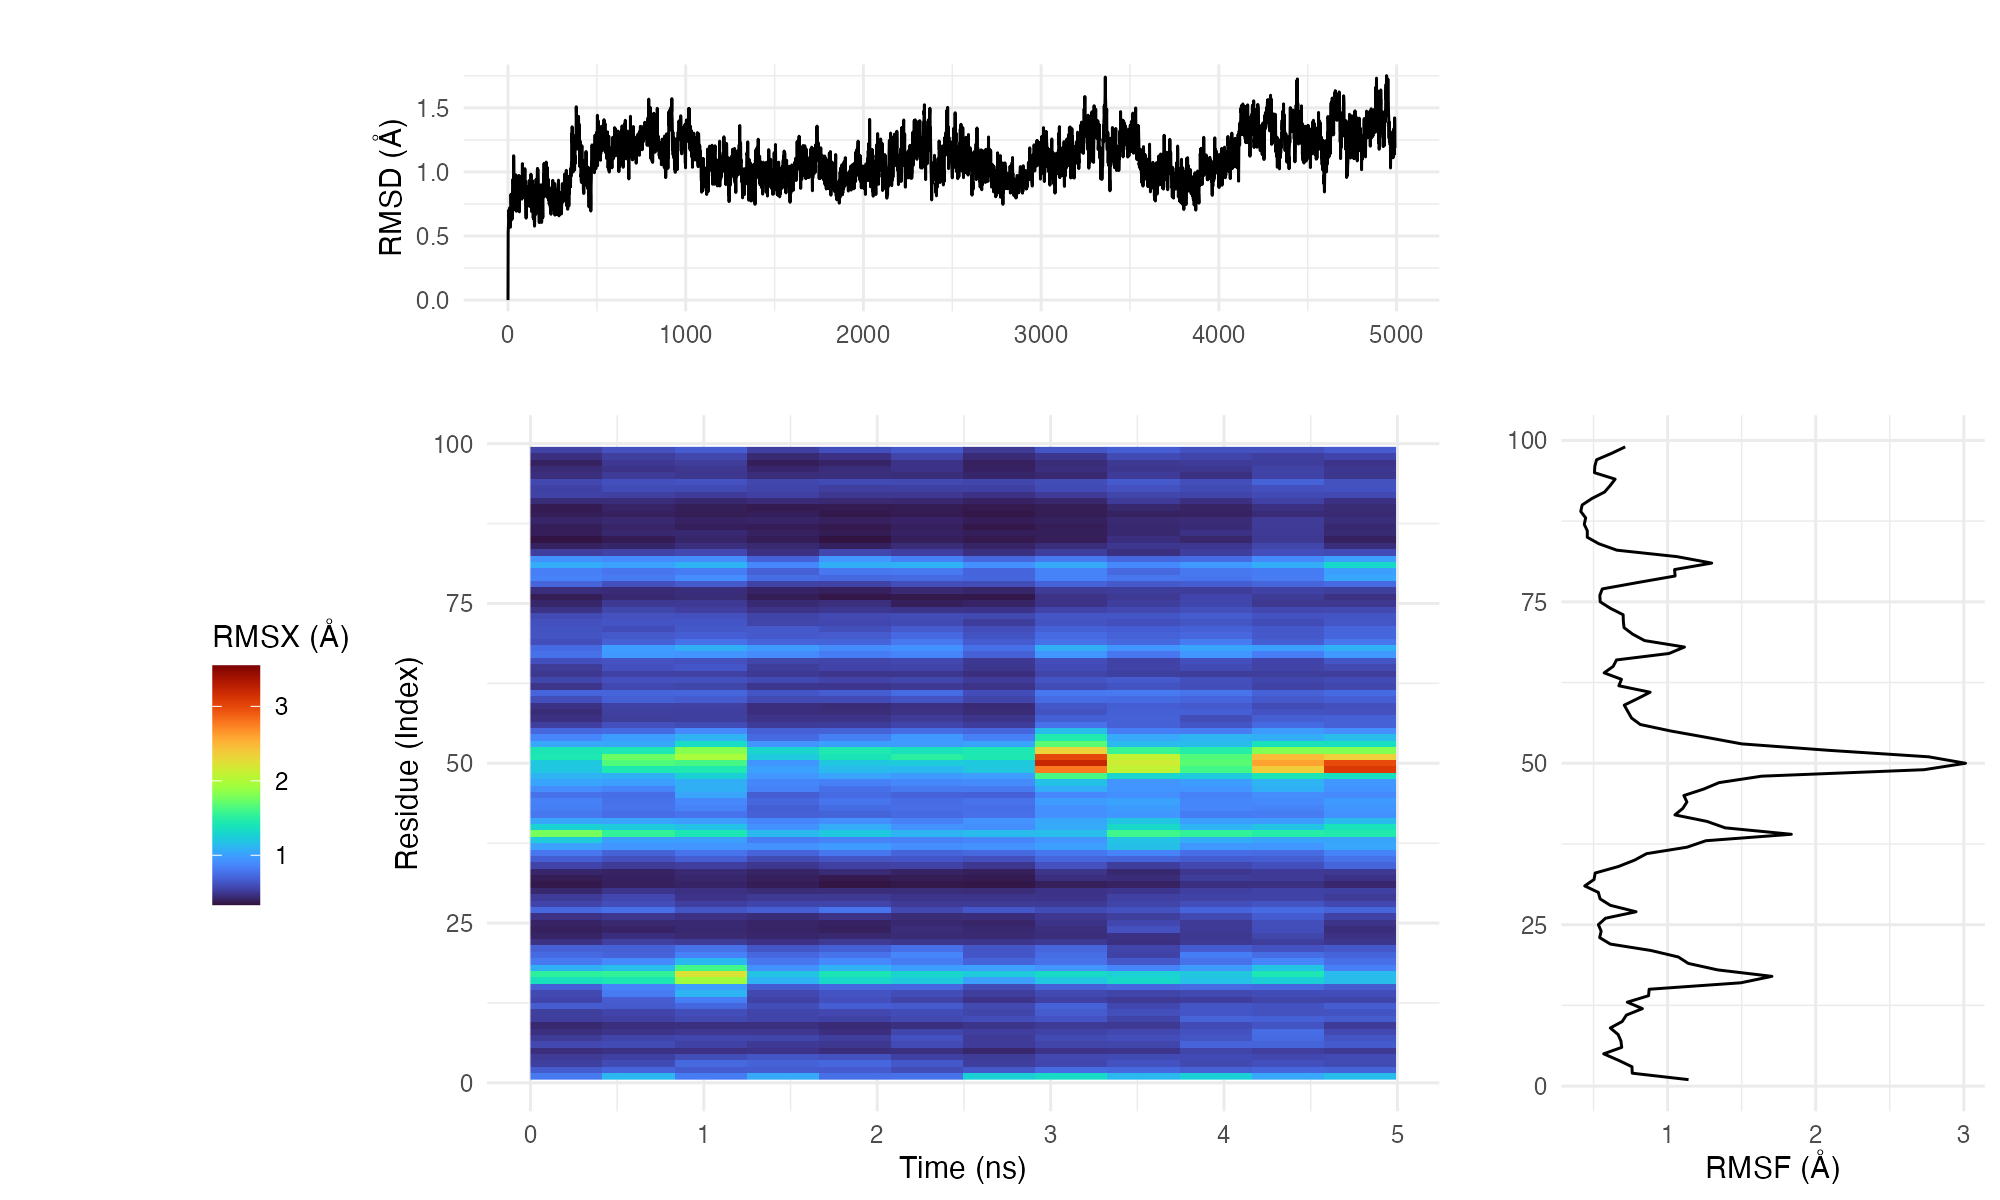

Detected B-factor range: 0.33 - 3.55
[flipbook] macOS bundle candidates (sorted):
   - ChimeraX-1.8.app -> /Applications/ChimeraX-1.8.app/Contents/MacOS/ChimeraX  (ver=1.8, daily=False)
   - ChimeraX-1.5.app -> /Applications/ChimeraX-1.5.app/Contents/MacOS/ChimeraX  (ver=1.5, daily=False)
   - ChimeraX_Daily.app -> /Applications/ChimeraX_Daily.app/Contents/MacOS/ChimeraX  (ver=0, daily=True)
[flipbook] Checking ChimeraX candidates (in order):
   - macOS app bundle (ChimeraX-1.8.app): /Applications/ChimeraX-1.8.app/Contents/MacOS/ChimeraX
[flipbook] Using ChimeraX installation: /Applications/ChimeraX-1.8.app/Contents/MacOS/ChimeraX
[flipbook] Launching: /Applications/ChimeraX-1.8.app/Contents/MacOS/ChimeraX
Full RMSX flipbook analysis completed successfully.


In [21]:
run_rmsx_flipbook(
    topology_file=pdb_file,
    trajectory_file=dcd_file,
    output_dir=output_dir,
    num_slices=12,
    slice_size=None,
    rscript_executable='Rscript',
    verbose=True,
    interpolate=False,
    triple=True,
    overwrite=True,
    palette="turbo",
    spacingFactor="0.8",   # Adjust space between models in the flipbook
    start_frame=0,
    end_frame=None
)